# Predict female behav from perturbed surrogate ppln activity

In [1]:
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import linear_model
import sys

from disp import set_plot
from my_torch import skl_fit_ridge

cc = np.concatenate


NNRN = 224

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

PFX_BHV = f'data/simple/behav_xtd/behav_xtd'

PTRAIN = .8
NSPLIT = 30

ALPHA = 10

NSPLIT_SAVE_Y_HAT = 5

MASK_PFX = 'data/simple/masks/mask'

if MASK_PFX:
    FSAVE_SFX = f'{TARG_BHV.lower()}_ridge_alpha_{ALPHA}_masked'
else:
    FSAVE_SFX = f'{TARG_BHV.lower()}_ridge_alpha_{ALPHA}'

In [2]:
STRAINS = ['NM91', 'ZH23']
STRAIN_KEY = '_'.join(STRAINS).lower()

FSTRAIN = 'data/simple/strains.csv'
MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = len(ISTRAIN)
NTRAIN = int(round(PTRAIN*NTR))

In [3]:
KEYS = [
    'no_sel',
    'pure_sel',
    'sine_sel',
    'pulse_sel',
#     'stim_inv_adapt',
    'no_adapt',
    'fast_r_fast_a',
    'fast_r_med_a',
    'fast_r_slow_a',
    'med_r_fast_a',
    'med_r_med_a',
    'med_r_slow_a',
    'slow_r_fast_a',
    'slow_r_med_a',
    'slow_r_slow_a',
]

In [4]:
R_COLS = [f'R_{ir}' for ir in range(NNRN)]  # use all responses

for key in KEYS:
    pfx_nrl = f'data/simple/mlv/ma_pert/baker_ma_{key}/mlv_baker_ma_{key}'
    
    fsave = f'data/simple/mlv/ma_pert/baker_ma_{key}_{STRAIN_KEY}_{FSAVE_SFX}.npy'
    
    # fit regression models
    rslts = skl_fit_ridge(
        pfxs=[pfx_nrl, PFX_BHV],
        cols_x=R_COLS,
        targs=TARGS,
        itr_all=ISTRAIN, 
        ntrain=NTRAIN,
        nsplit=NSPLIT,
        mask_pfx=MASK_PFX,
        return_y=np.arange(NSPLIT_SAVE_Y_HAT),
        alpha=ALPHA)

    # save r2, weights, and example predictions
    save_data = {
        'r2_train': {targ: np.array([rslt.r2_train[targ] for rslt in rslts]) for targ in TARGS},
        'r2_test': {targ: np.array([rslt.r2_test[targ] for rslt in rslts]) for targ in TARGS},
        
        'w': {targ: np.array([rslt.w[targ] for rslt in rslts]) for targ in TARGS},
        
        'ys_train': {targ: [rslt.ys_train[targ] for rslt in rslts if rslt.ys_train] for targ in TARGS},
        'ys_test': {targ: [rslt.ys_test[targ] for rslt in rslts if rslt.ys_train] for targ in TARGS},
        
        'y_hats_train': {targ: [rslt.y_hats_train[targ] for rslt in rslts if rslt.ys_train] for targ in TARGS},
        'y_hats_test': {targ: [rslt.y_hats_test[targ] for rslt in rslts if rslt.ys_train] for targ in TARGS},
        
        'targs': TARGS,
        'alpha': ALPHA,
        
        'ntr': NTR,
        'ntrain': NTRAIN,
        'nsplit': NSPLIT,
        
        'nr': len(R_COLS)
    }

    np.save(fsave, np.array([save_data]))

Loading...

Split 0
Split 1
Split 2
Split 3
Split 4
Split 5
Split 6
Split 7
Split 8
Split 9
Split 10
Split 11
Split 12
Split 13
Split 14
Split 15
Split 16
Split 17
Split 18
Split 19
Split 20
Split 21
Split 22
Split 23
Split 24
Split 25
Split 26
Split 27
Split 28
Split 29Loading...

Split 0
Split 1
Split 2
Split 3
Split 4
Split 5
Split 6
Split 7
Split 8
Split 9
Split 10
Split 11
Split 12
Split 13
Split 14
Split 15
Split 16
Split 17
Split 18
Split 19
Split 20
Split 21
Split 22
Split 23
Split 24
Split 25
Split 26
Split 27
Split 28
Split 29Loading...

Split 0
Split 1
Split 2
Split 3
Split 4
Split 5
Split 6
Split 7
Split 8
Split 9
Split 10
Split 11
Split 12
Split 13
Split 14
Split 15
Split 16
Split 17
Split 18
Split 19
Split 20
Split 21
Split 22
Split 23
Split 24
Split 25
Split 26
Split 27
Split 28
Split 29Loading...

Split 0
Split 1
Split 2
Split 3
Split 4
Split 5
Split 6
Split 7
Split 8
Split 9
Split 10
Split 11
Split 12
Split 13
Split 14
Split 15
Split 16
Split 17
Split 18
Split 19
Split

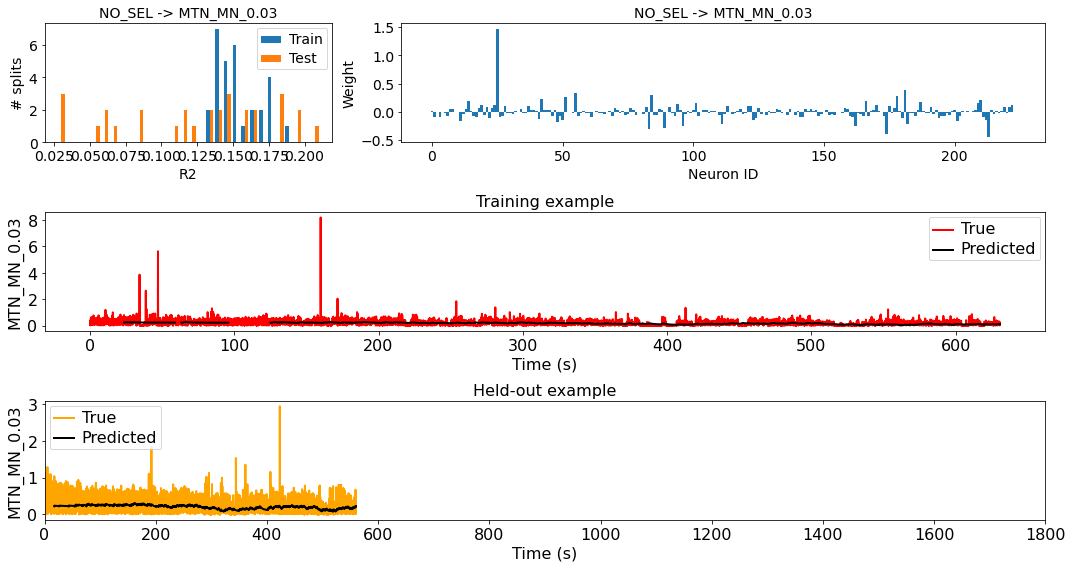

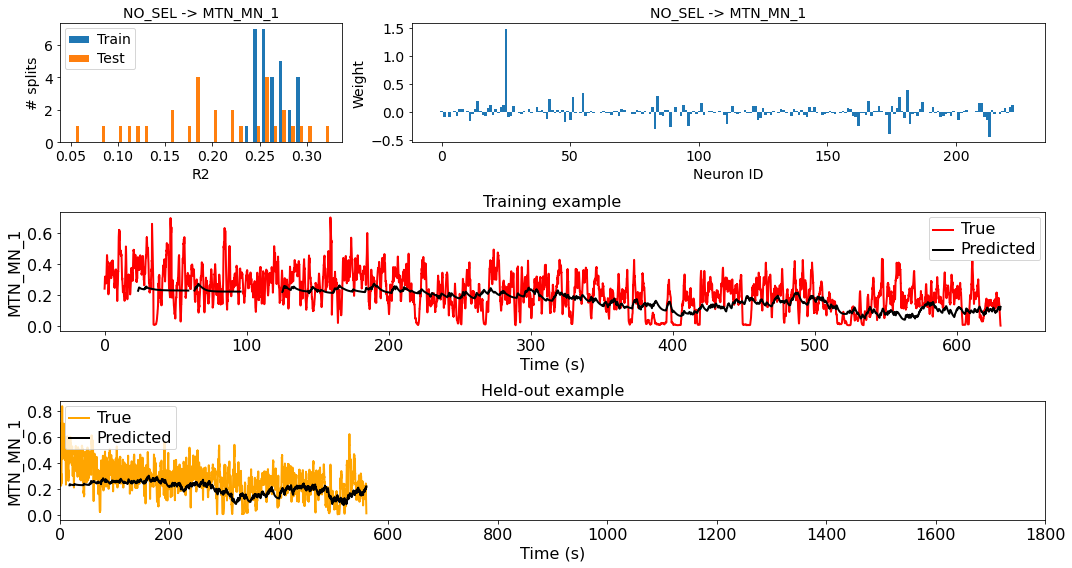

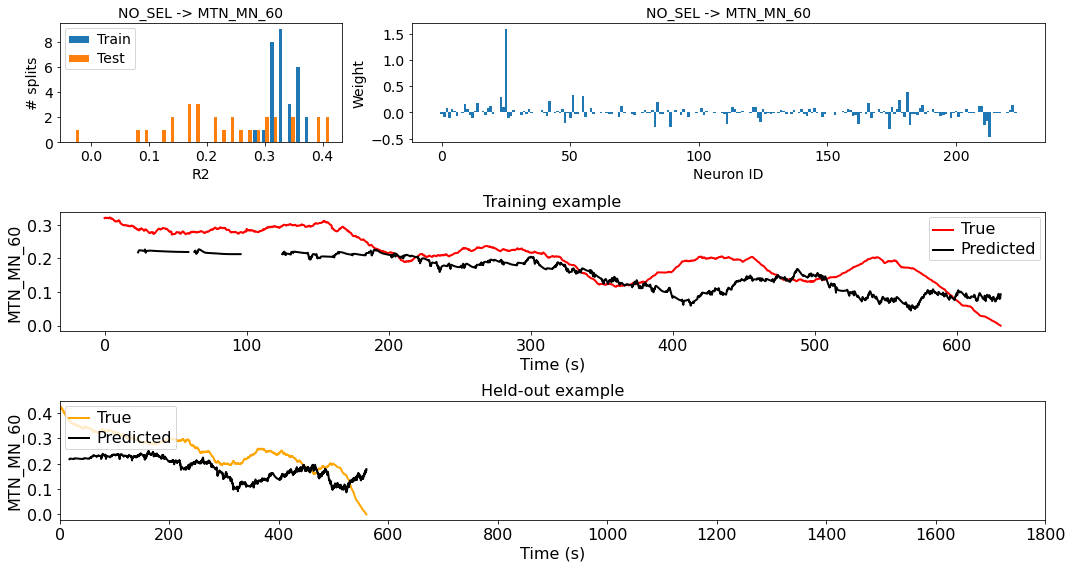

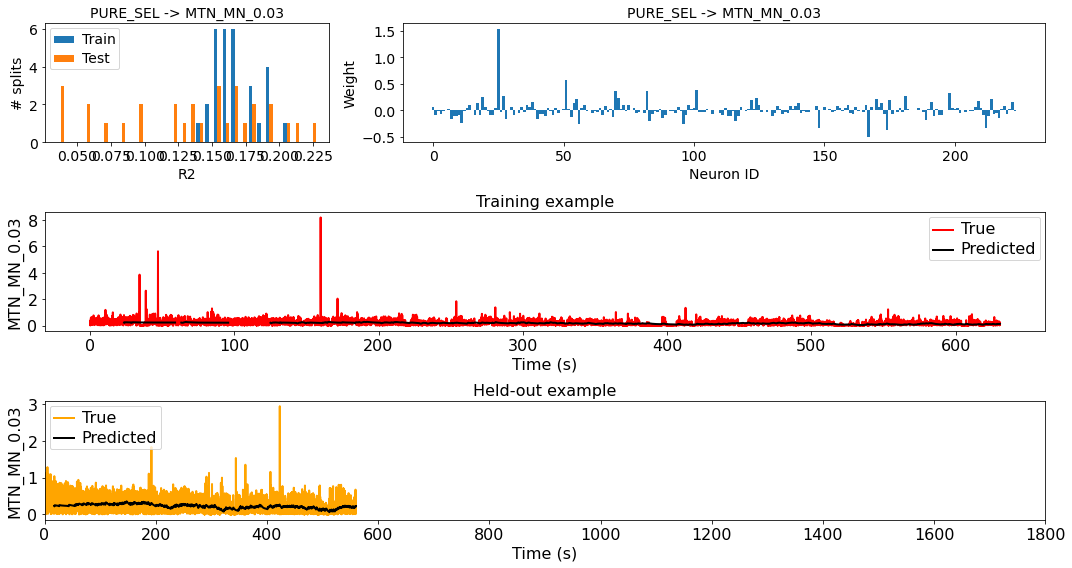

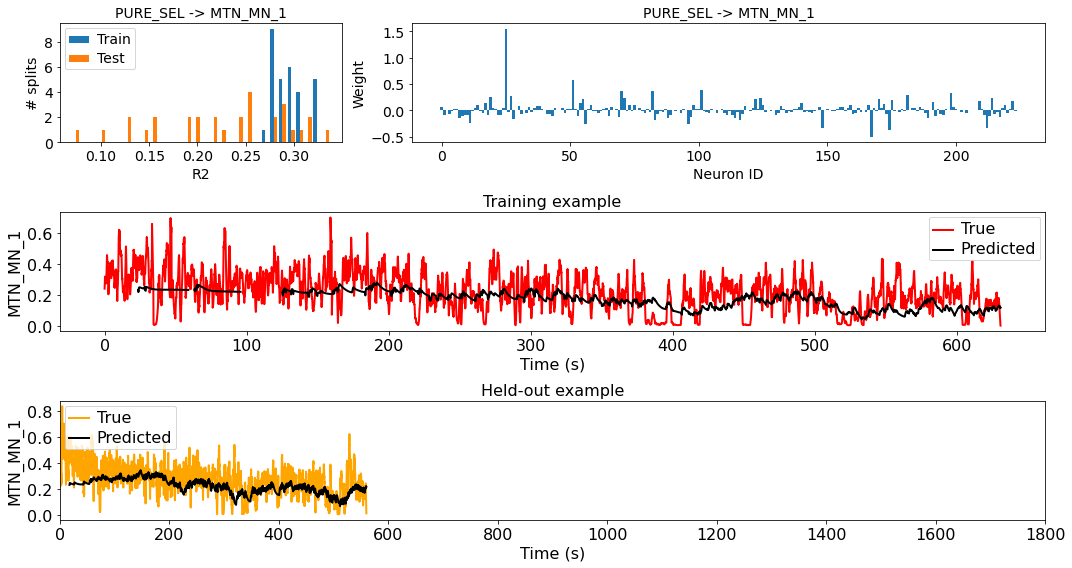

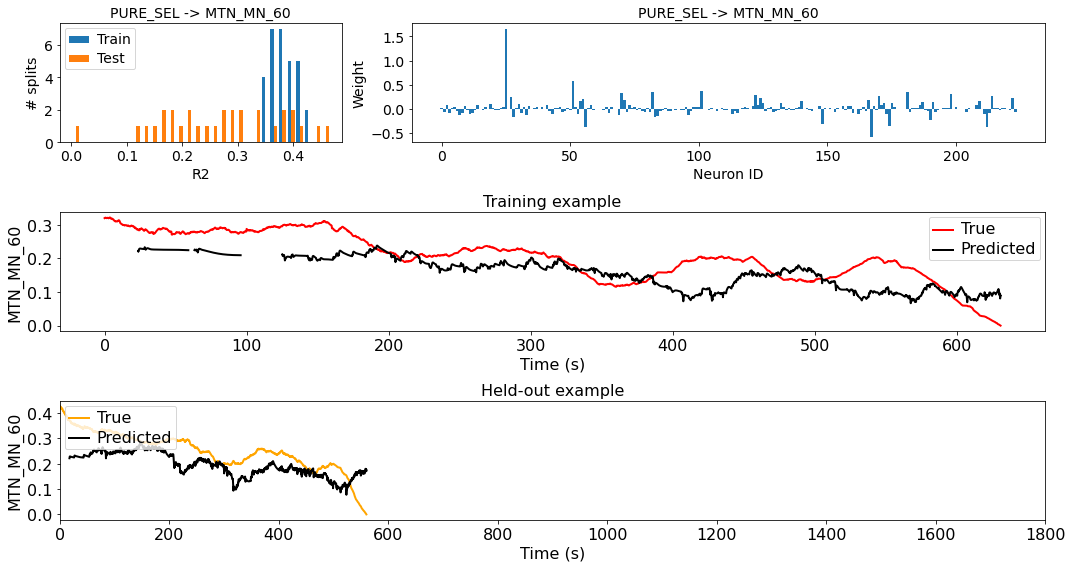

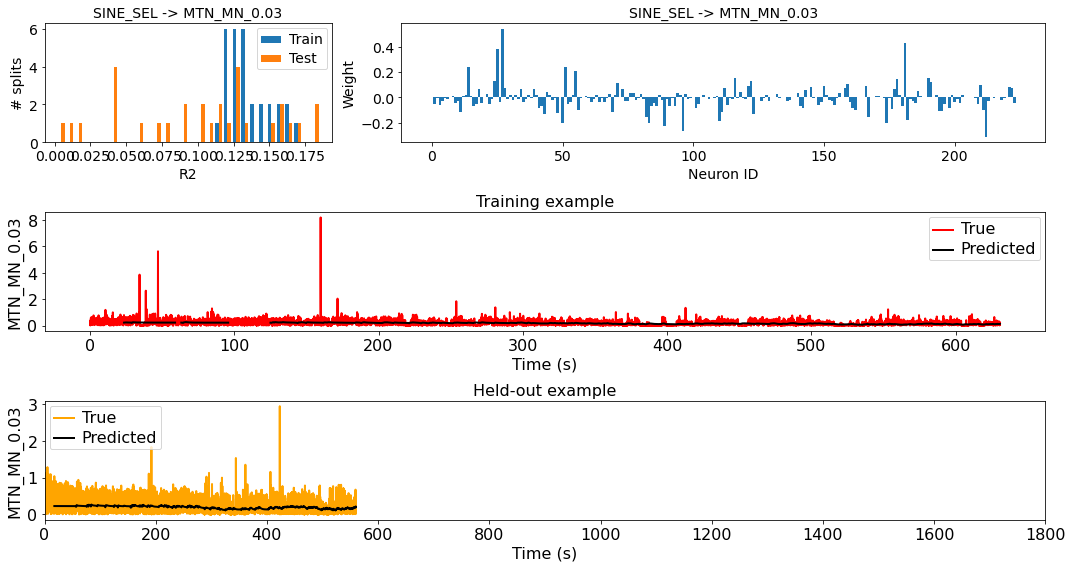

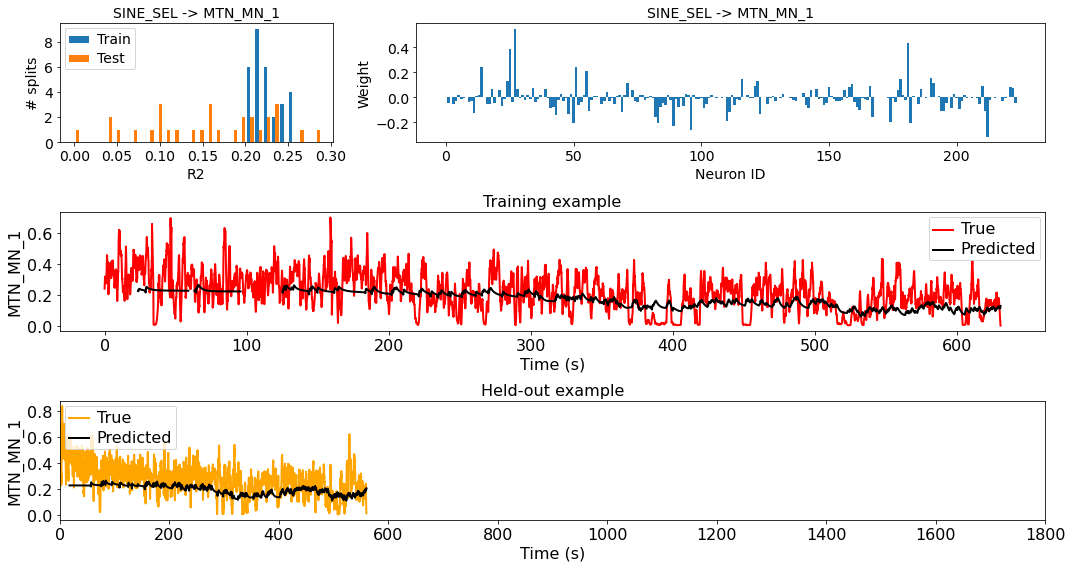

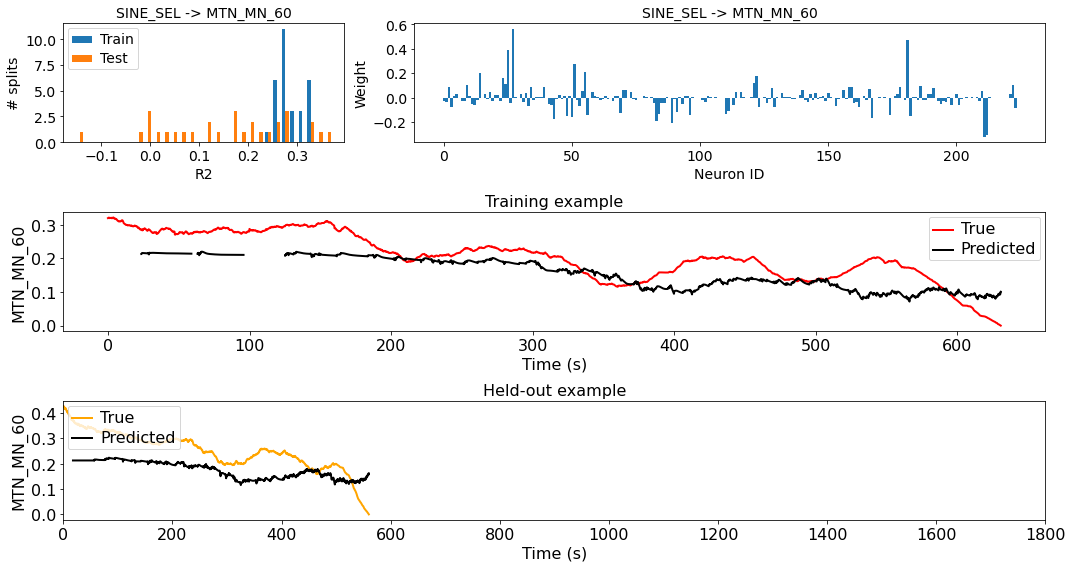

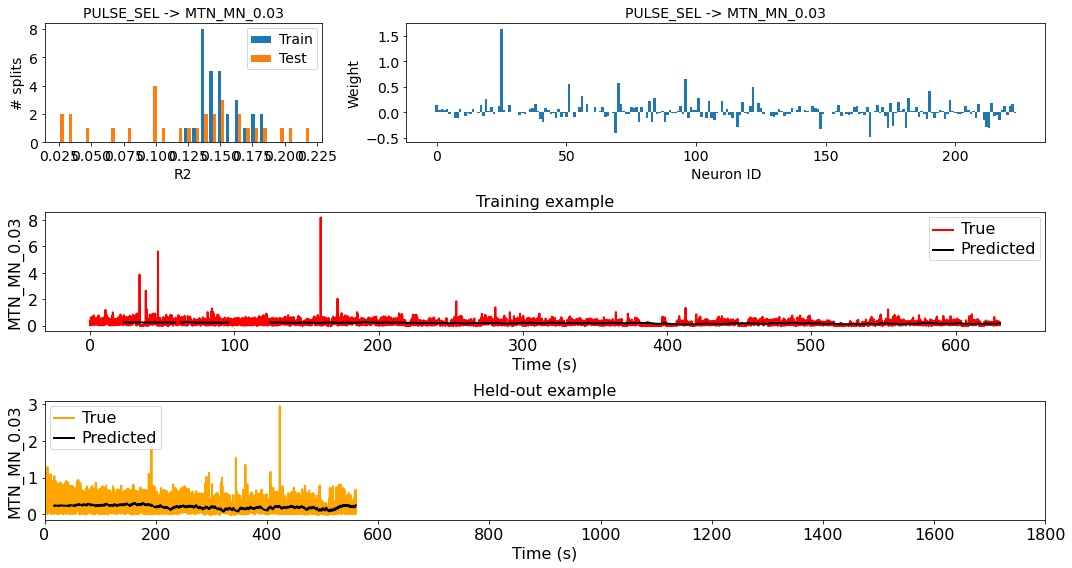

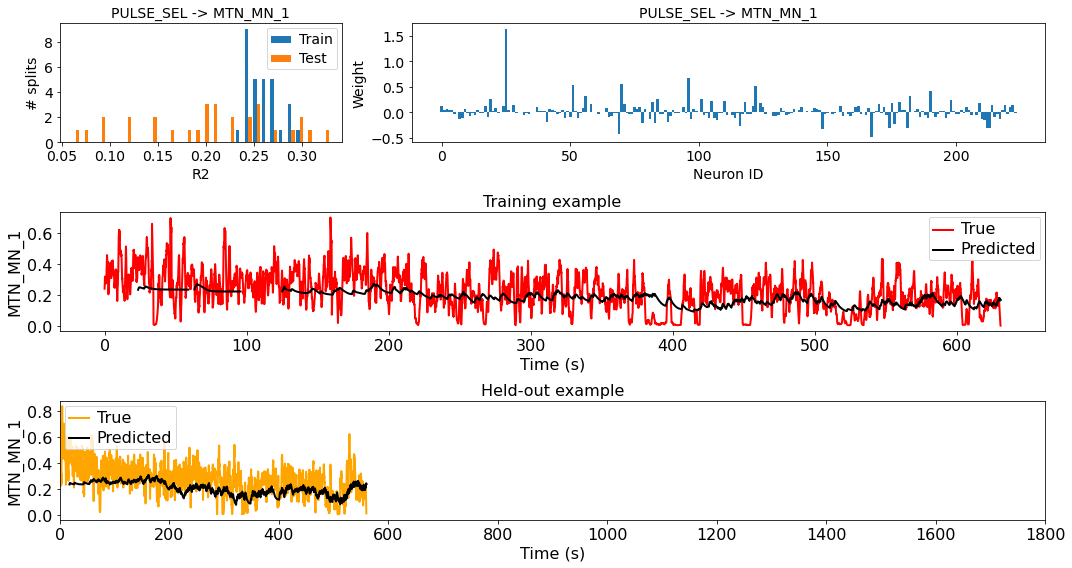

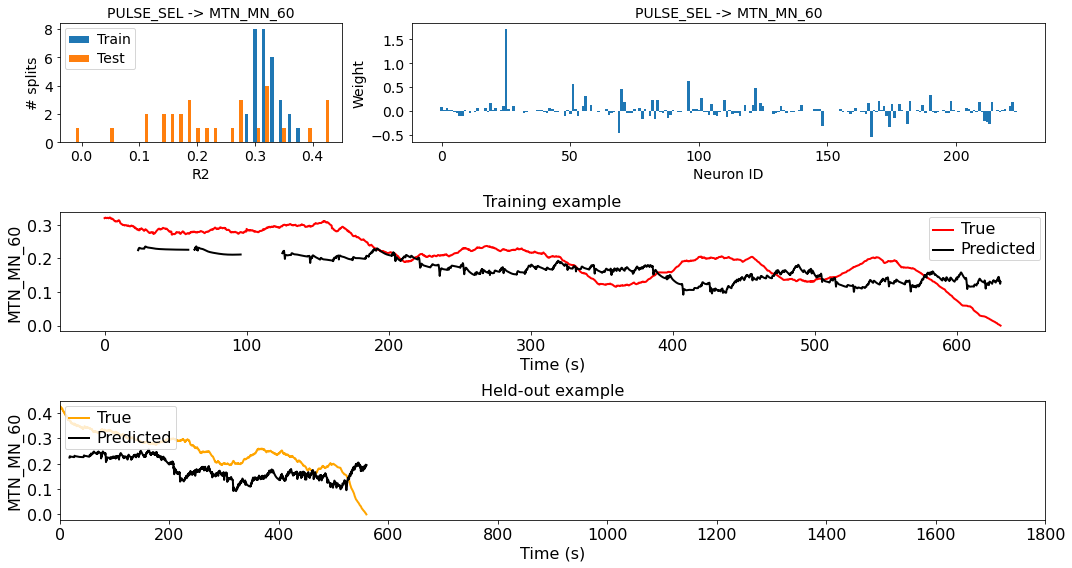

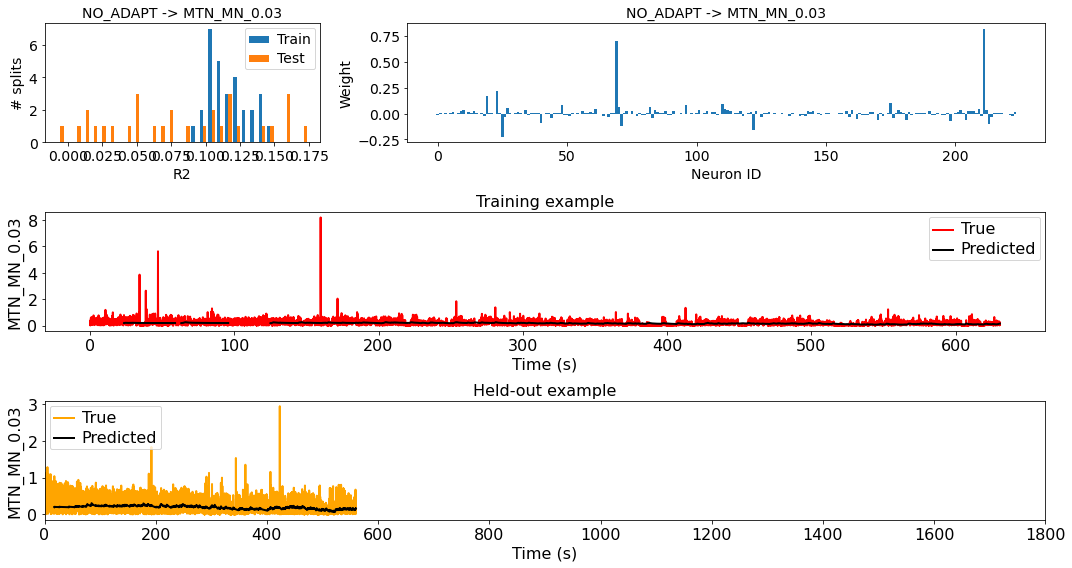

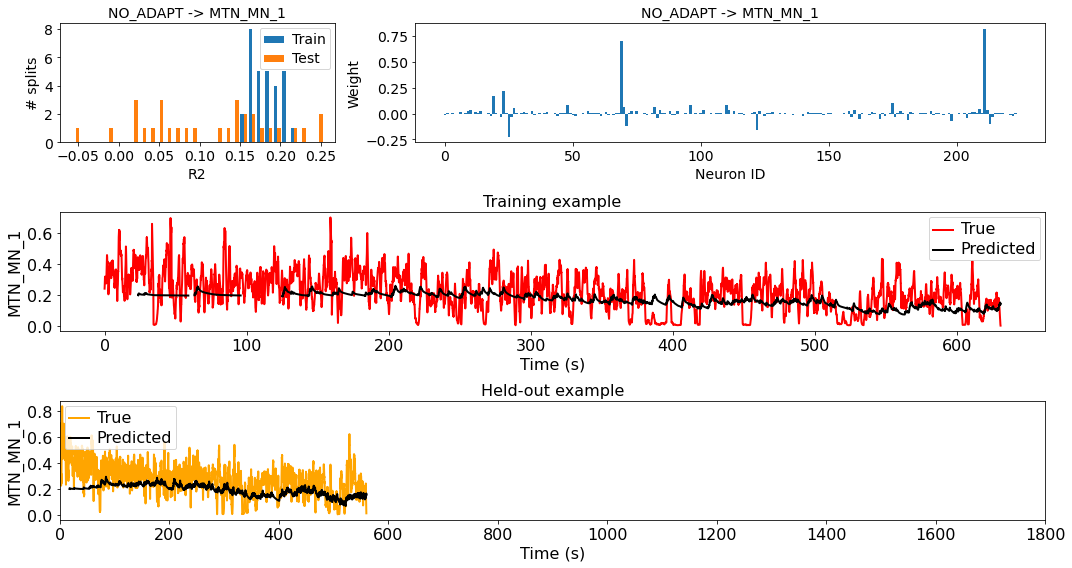

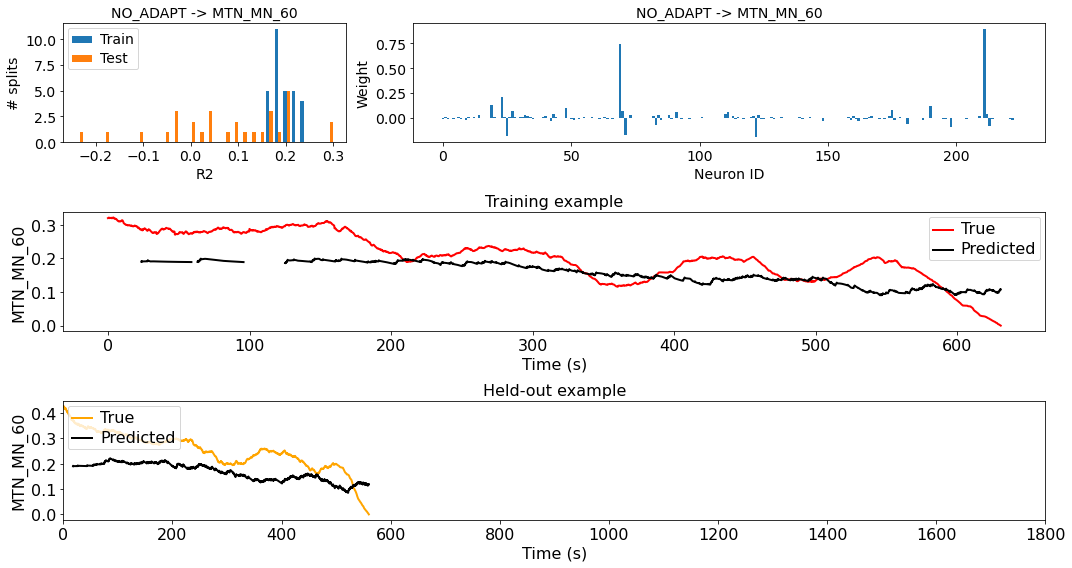

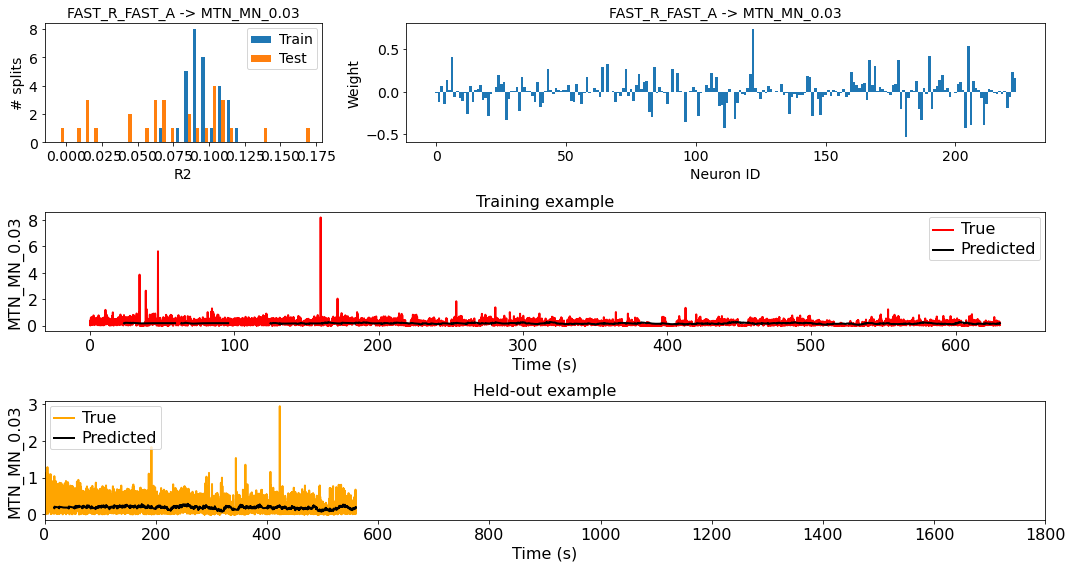

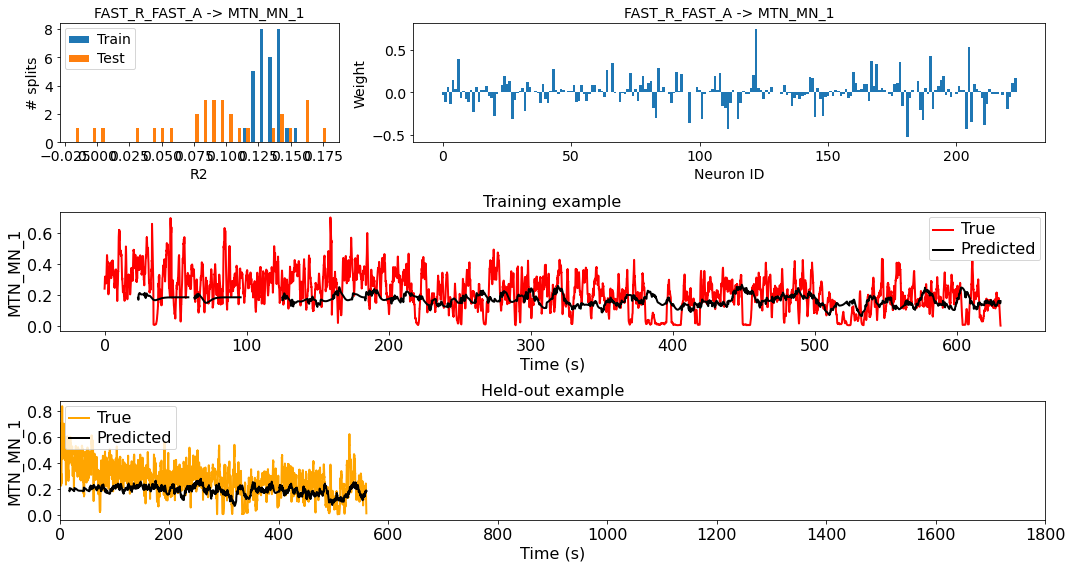

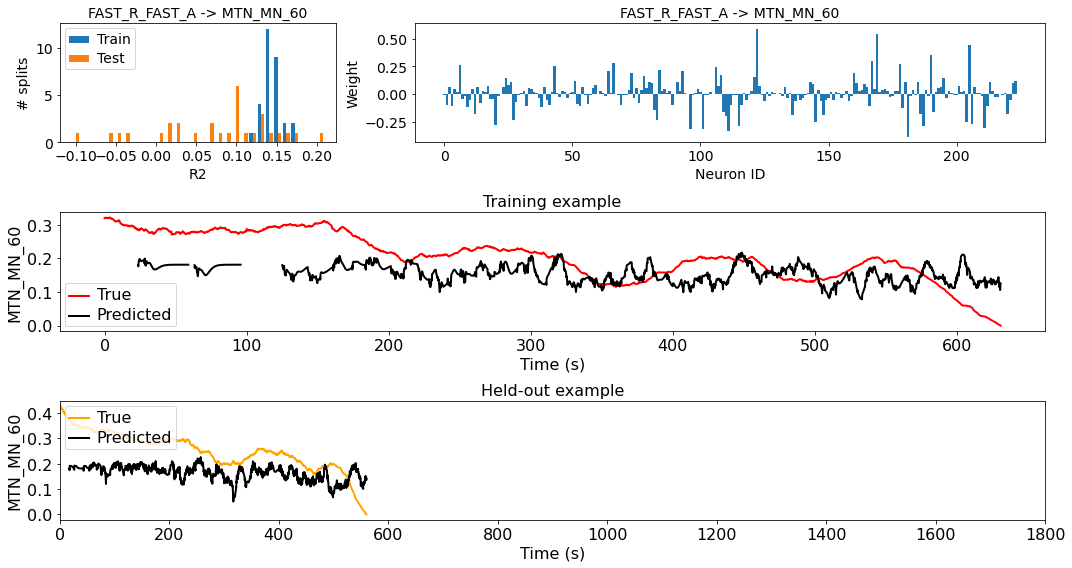

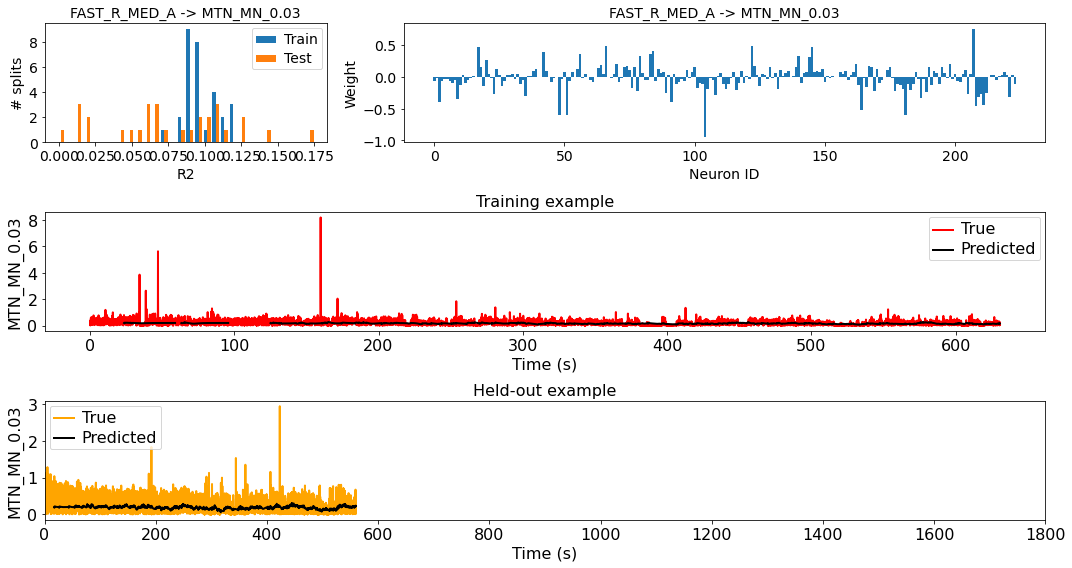

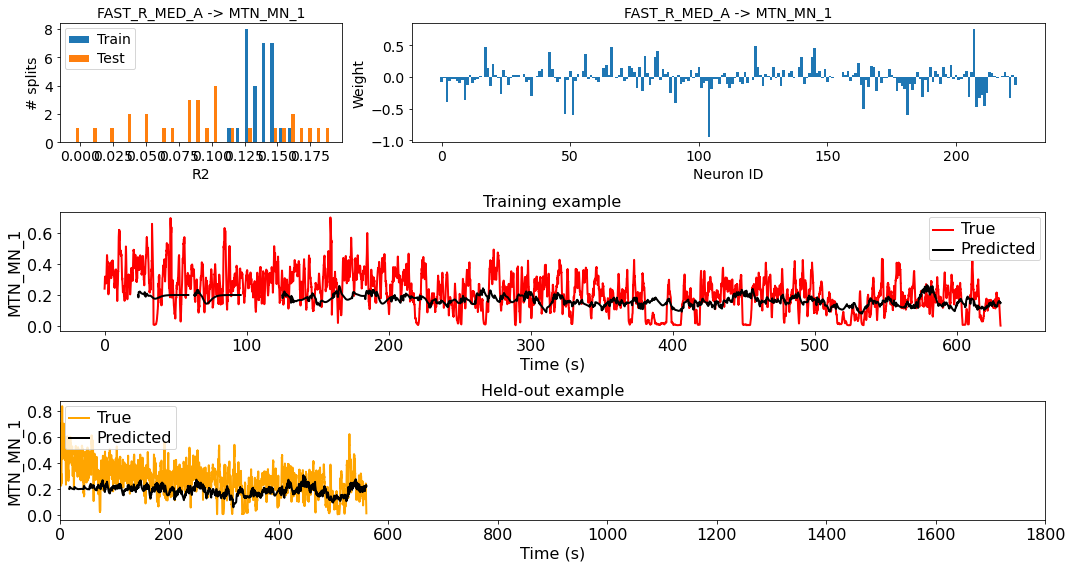

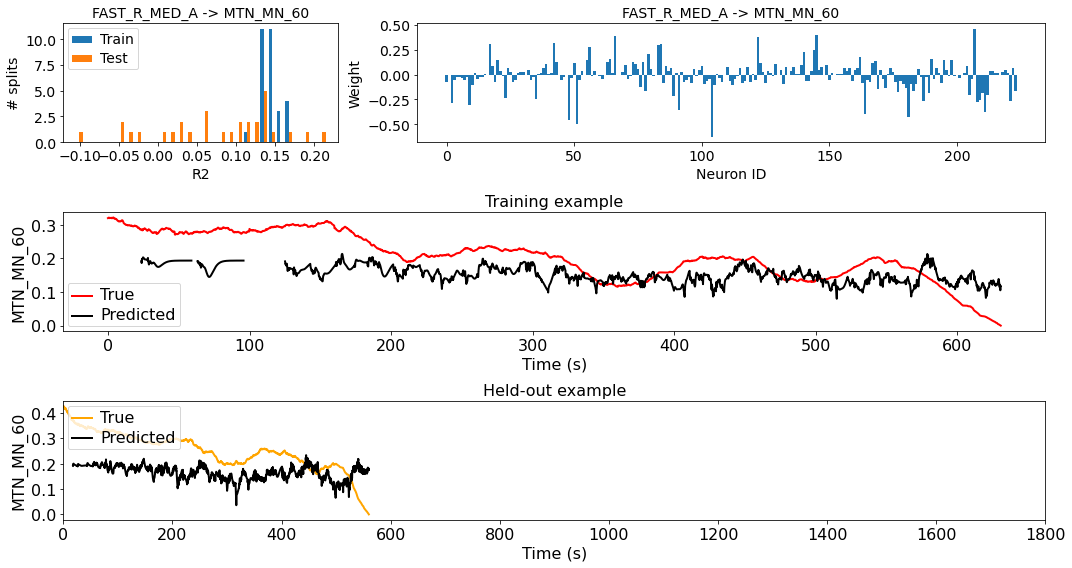

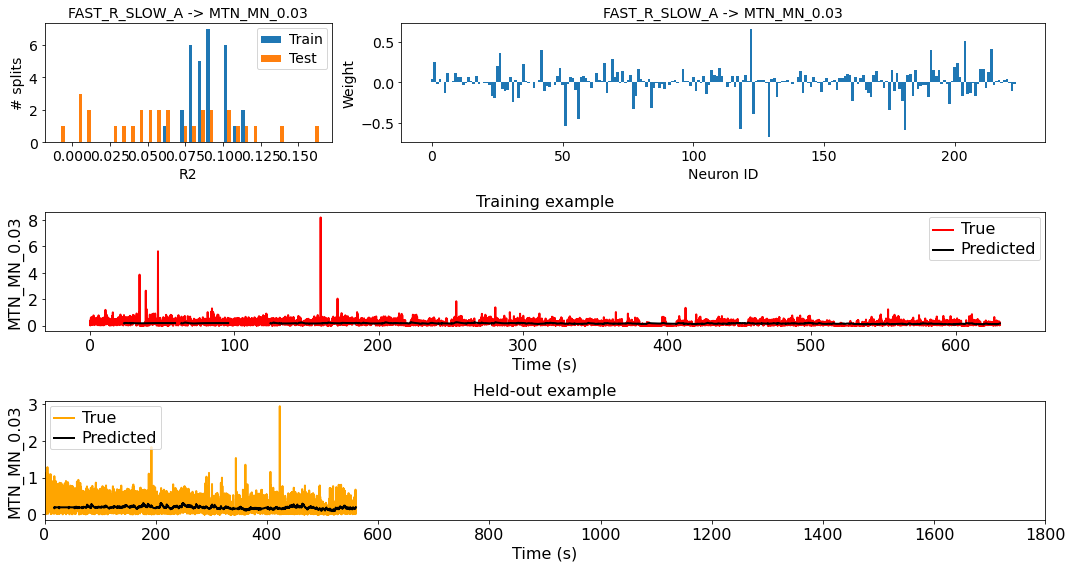

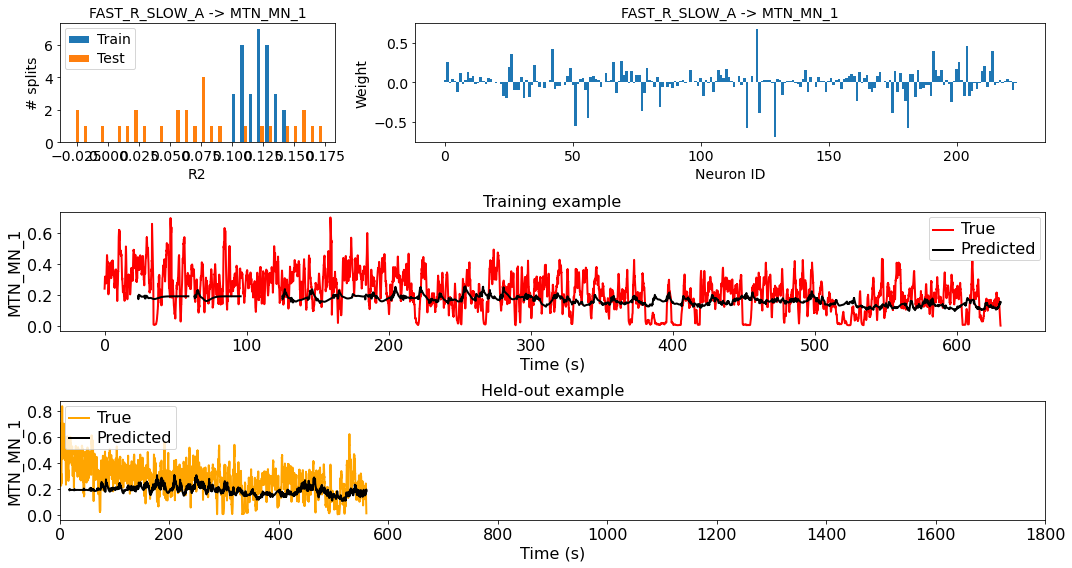

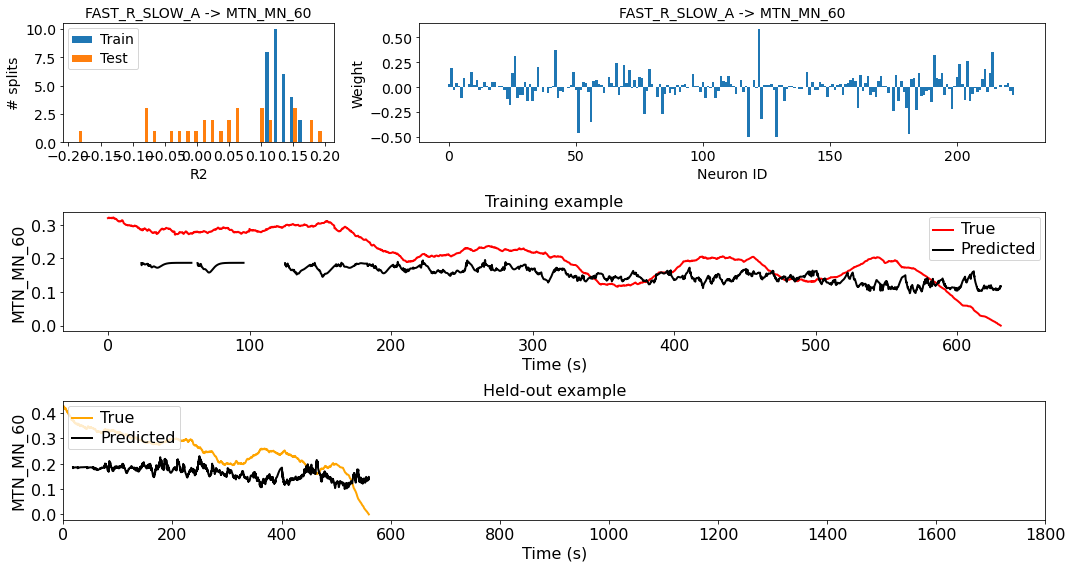

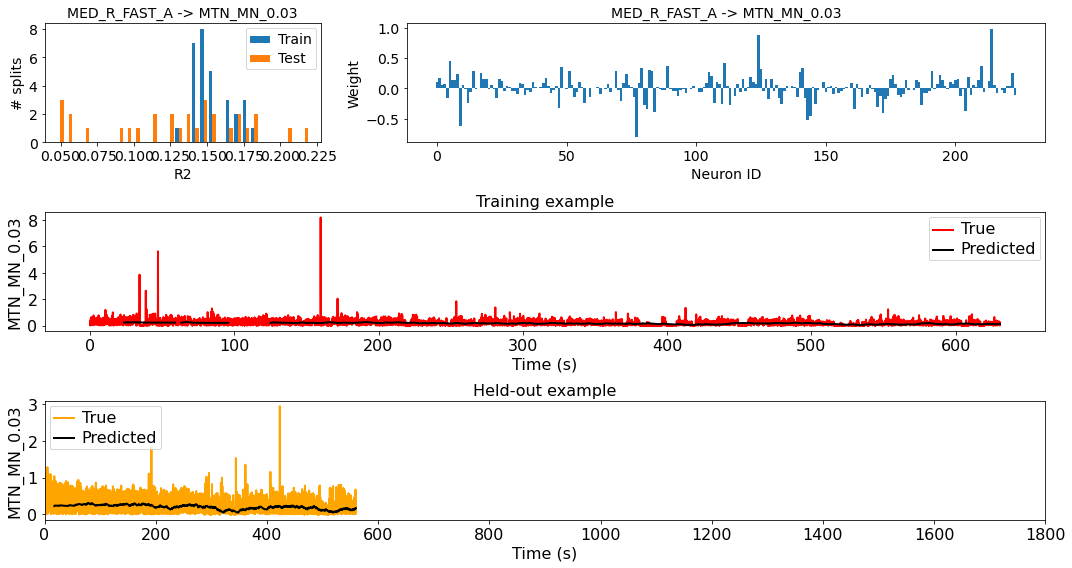

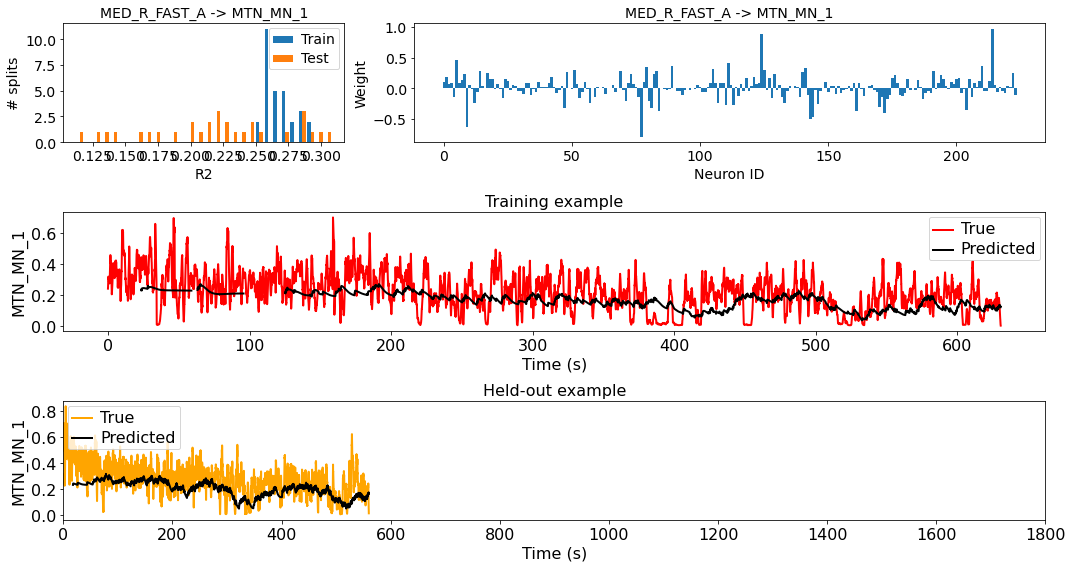

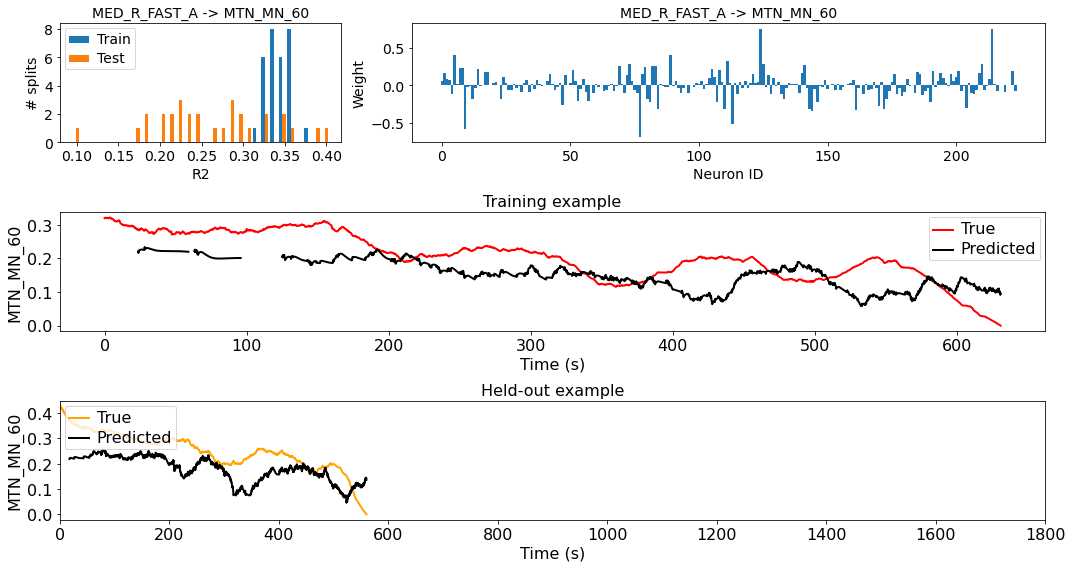

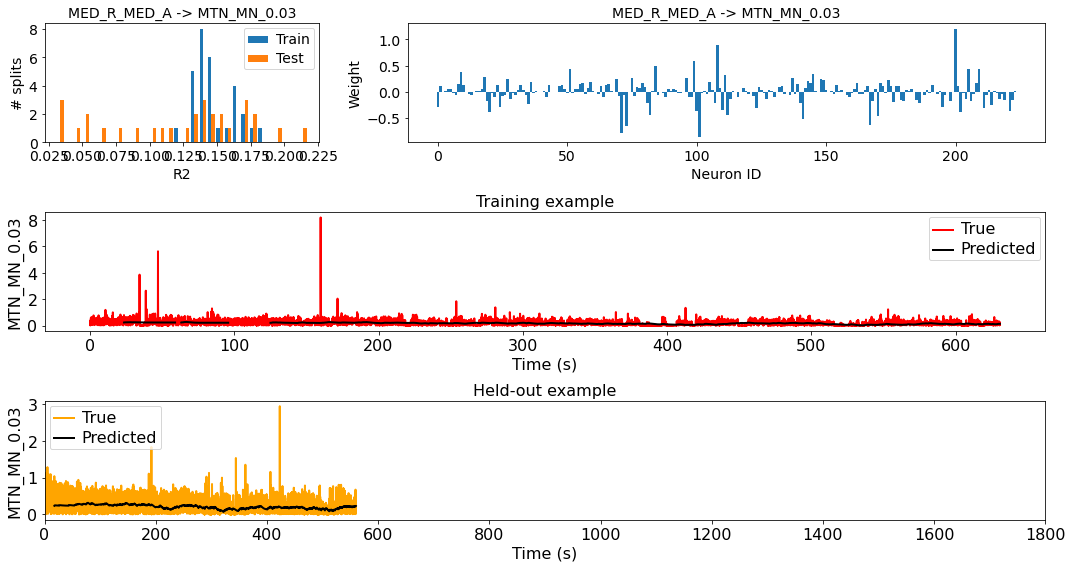

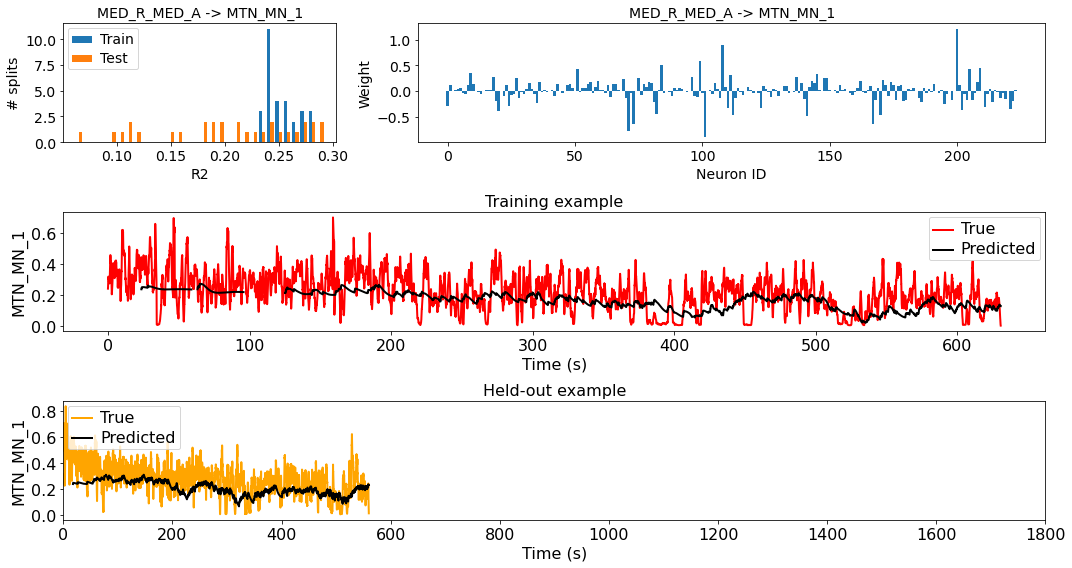

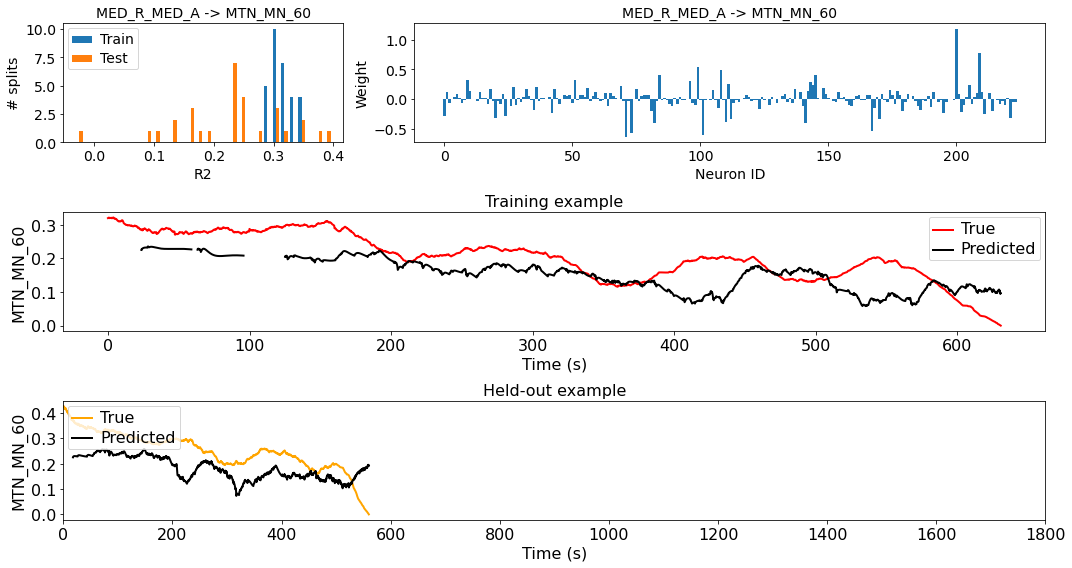

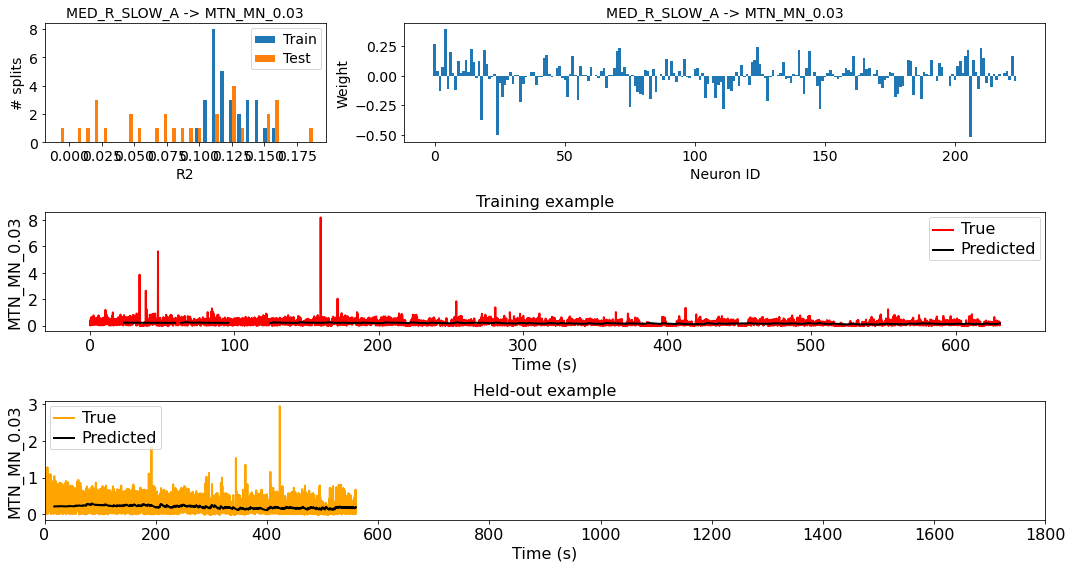

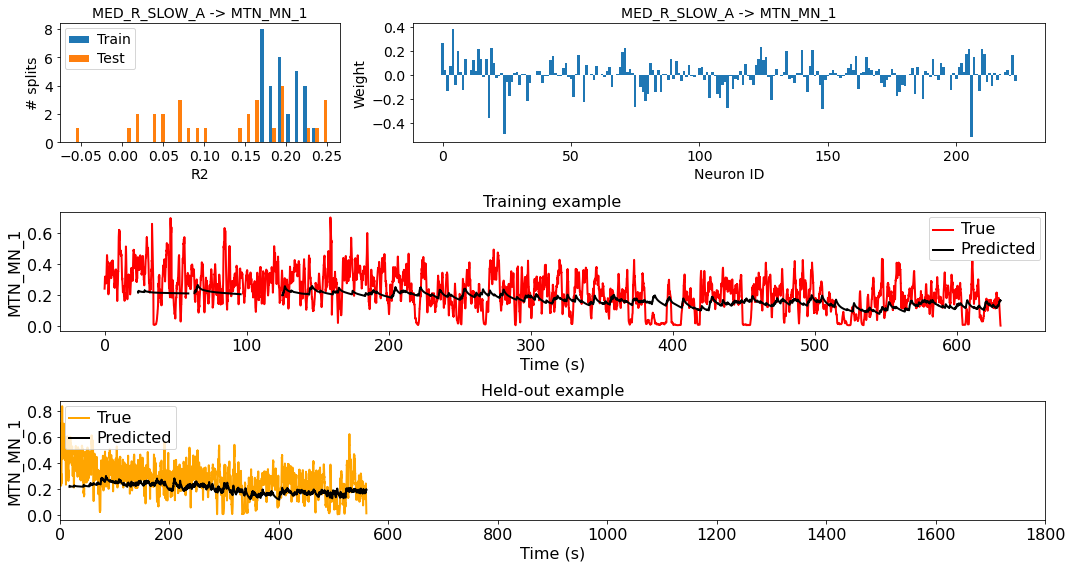

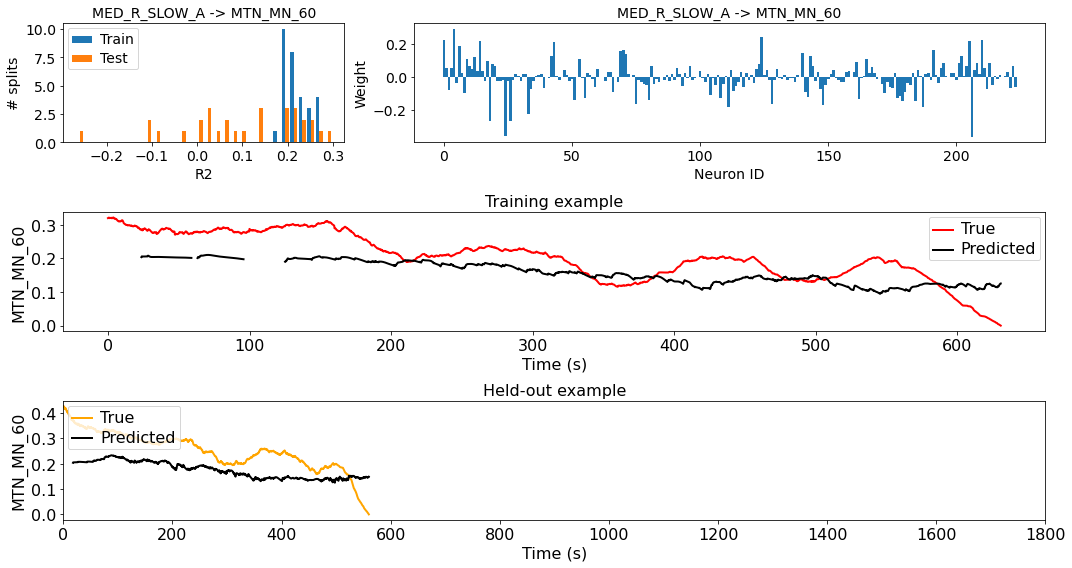

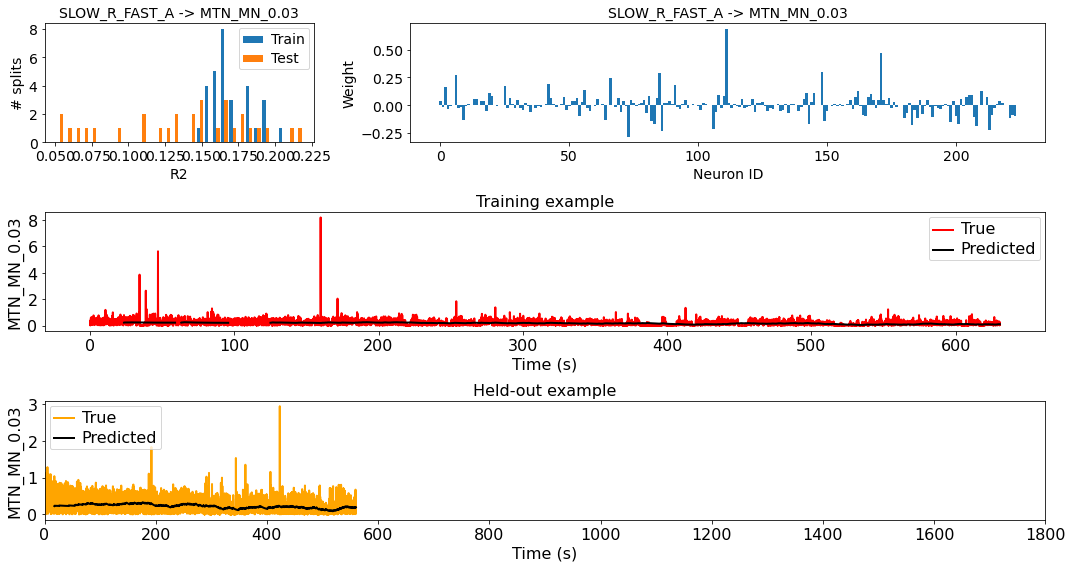

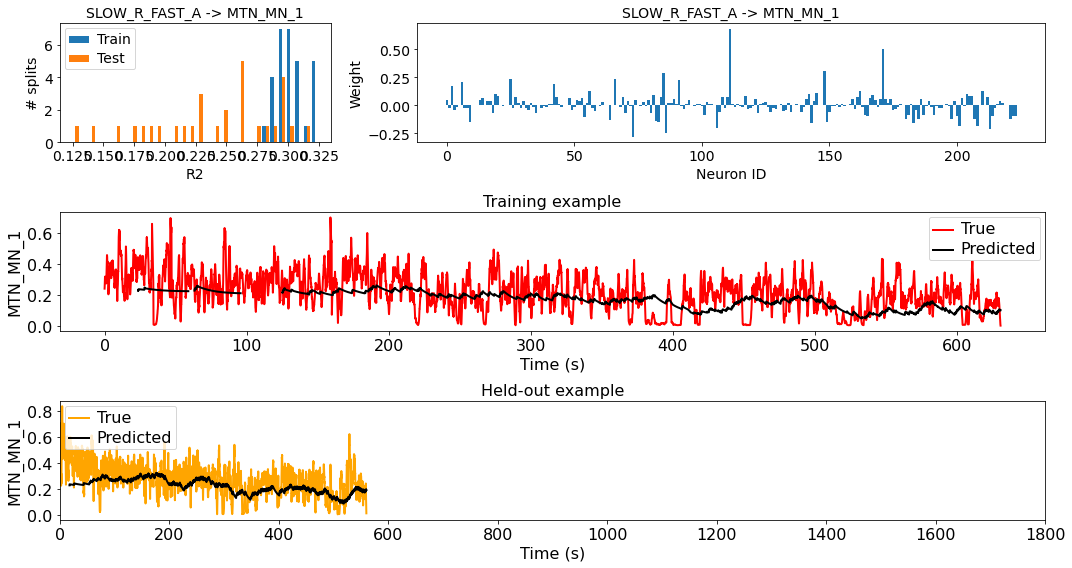

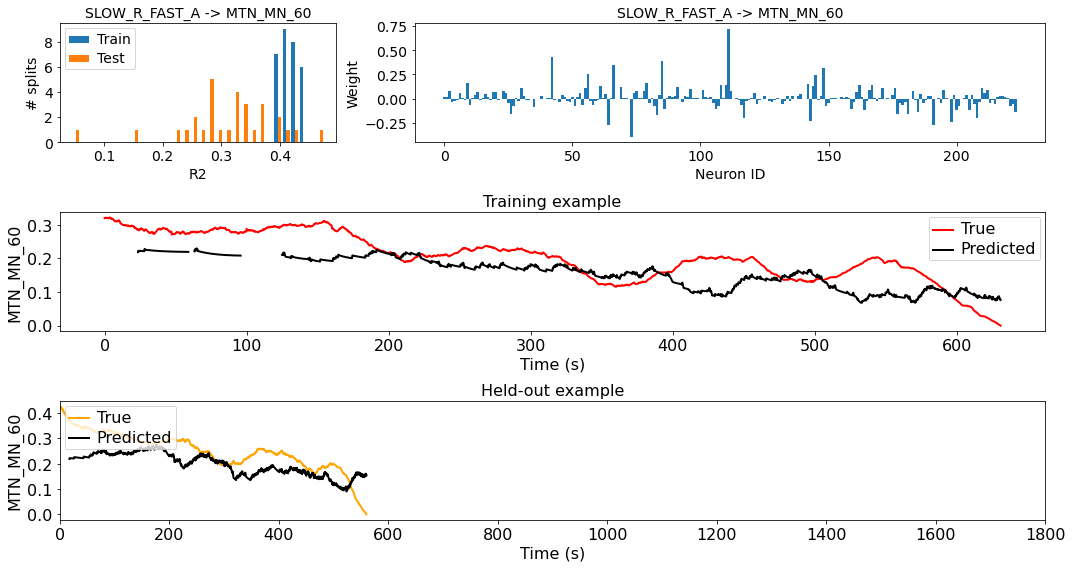

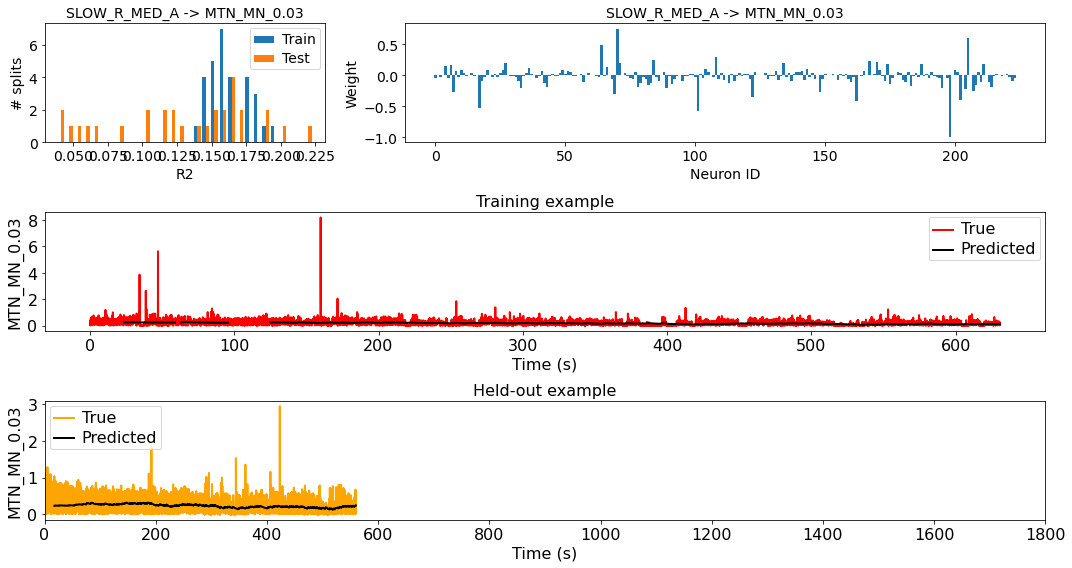

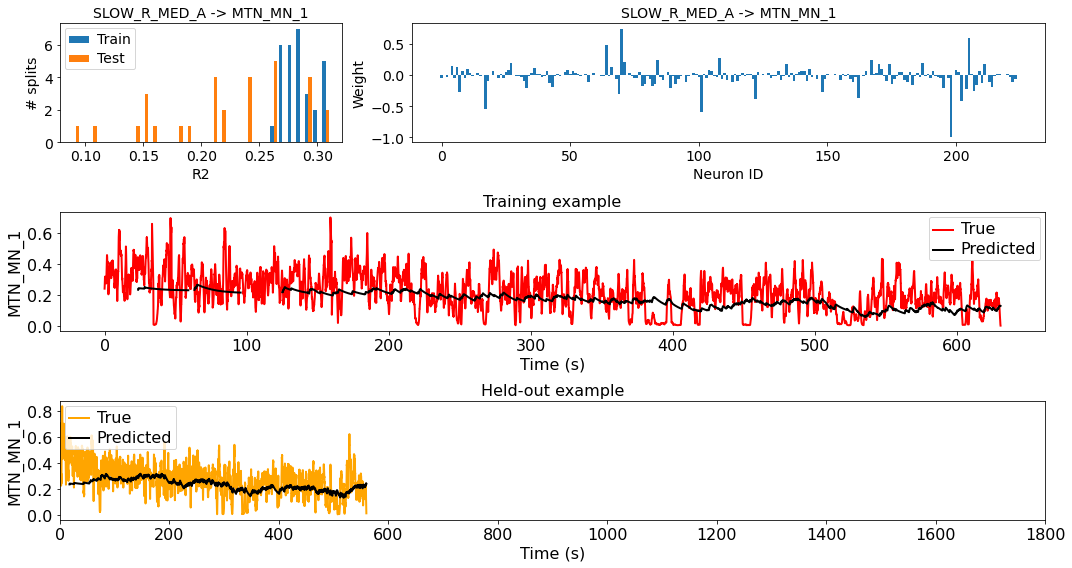

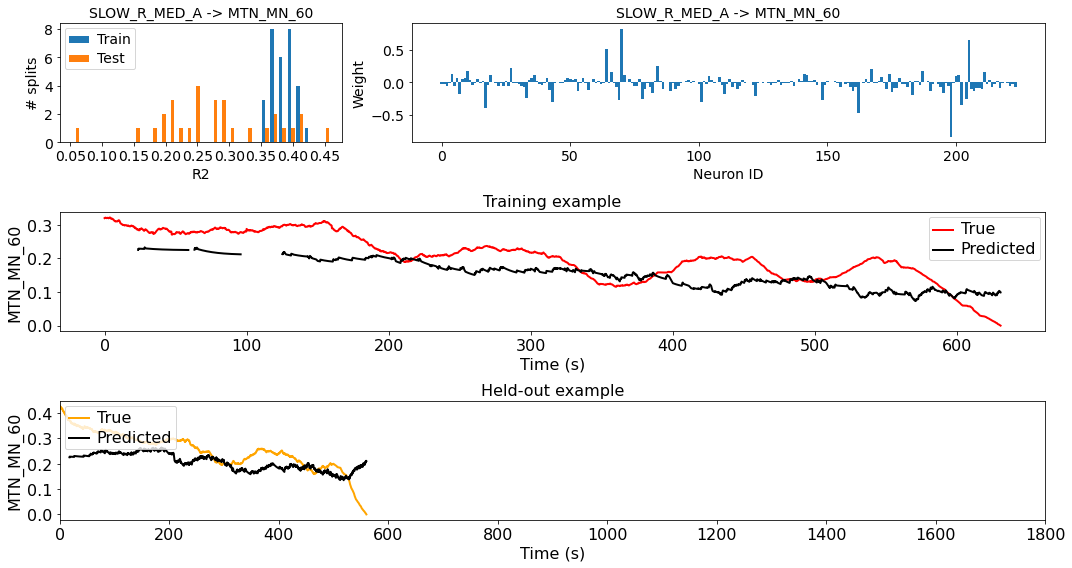

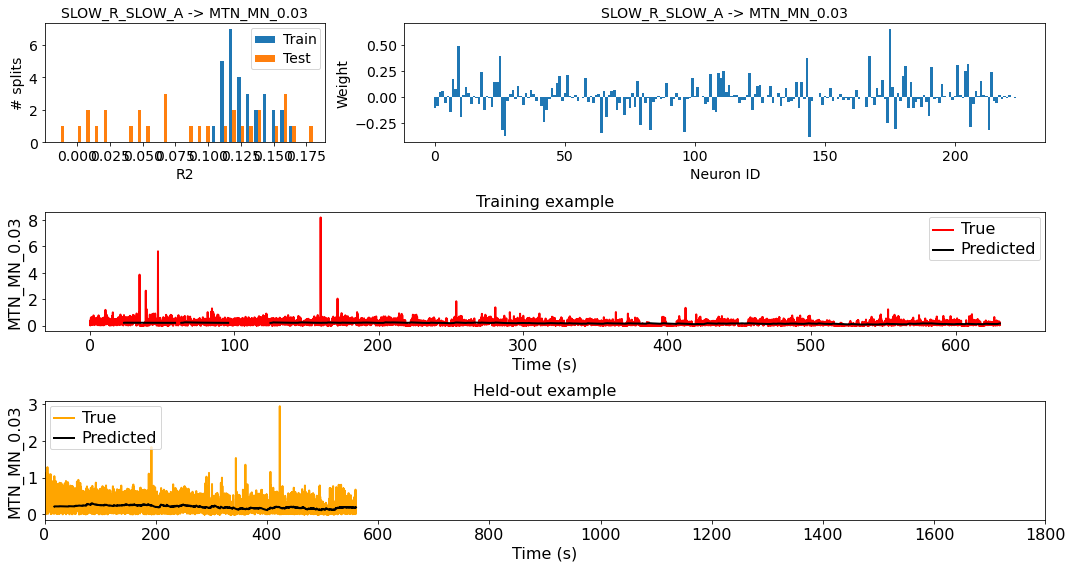

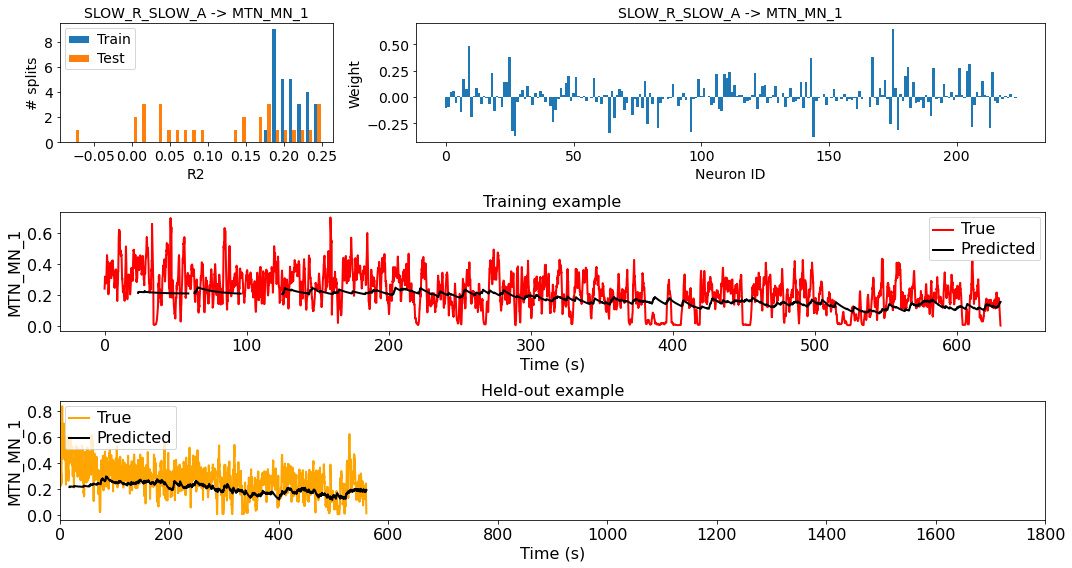

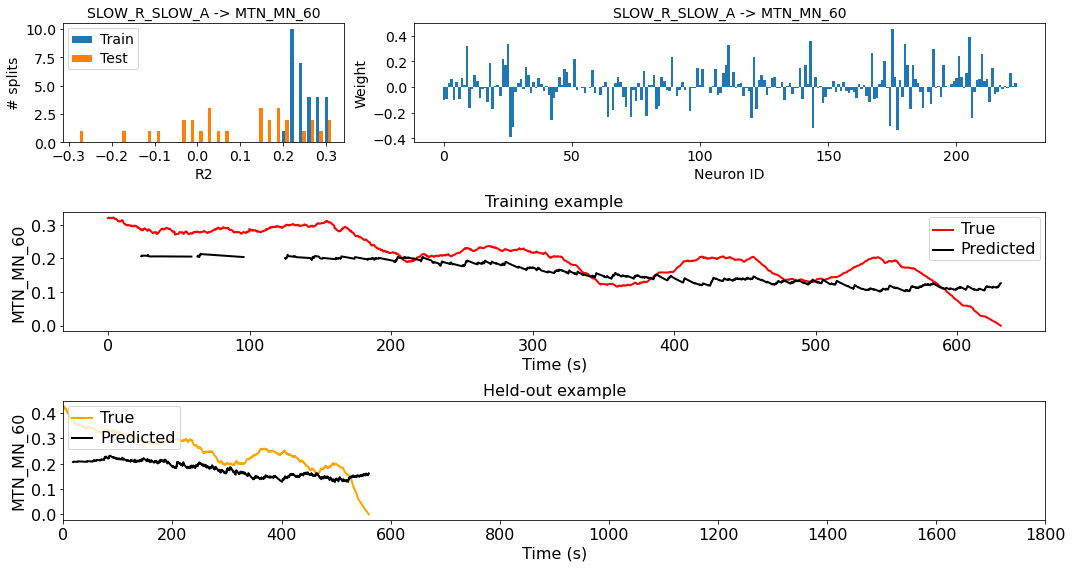

In [5]:
ISPLIT = 0
ITRAIN_PLOT = 1
ITEST_PLOT = 1

FPS = 30.03

for key in KEYS:
    fsave = f'data/simple/mlv/ma_pert/baker_ma_{key}_{STRAIN_KEY}_{FSAVE_SFX}.npy'
    data = np.load(fsave, allow_pickle=True)[0]

    for targ in TARGS:
        
        r2_train = data['r2_train'][targ]
        r2_test = data['r2_test'][targ]
        
        gs = gridspec.GridSpec(3, 3)

        fig = plt.figure(figsize=(15, 8), tight_layout=True)
        axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:]), fig.add_subplot(gs[1, :]), fig.add_subplot(gs[2, :])]

        axs[0].hist(np.transpose([r2_train, r2_test]), bins=30)
        axs[0].legend(['Train', 'Test'])
        
        set_plot(axs[0], x_label='R2', y_label='# splits', title=f'{key.upper()} -> {targ}', font_size=14)

        axs[1].bar(np.arange(data['w'][targ].shape[1]), np.mean(data['w'][targ], axis=0), width=1)
        set_plot(axs[1], x_label='Neuron ID', y_label='Weight', title=f'{key.upper()} -> {targ}', font_size=14)

        y_train = data['ys_train'][targ][ISPLIT][ITRAIN_PLOT]
        t_train = np.arange(len(y_train))/FPS
        
        y_hat_train = data['y_hats_train'][targ][ISPLIT][ITRAIN_PLOT]
        
        axs[2].plot(t_train, y_train, c='r', lw=2)
        axs[2].plot(t_train, y_hat_train, c='k', lw=2)
        
        axs[2].legend(['True', 'Predicted'])
        
        set_plot(axs[2], x_label='Time (s)', y_label=targ, title='Training example', font_size=16)

        y_test = data['ys_test'][targ][ISPLIT][ITEST_PLOT]
        t_test = np.arange(len(y_test))/FPS
        
        y_hat_test = data['y_hats_test'][targ][ISPLIT][ITEST_PLOT]
        
        axs[3].plot(t_test, y_test, c='orange', lw=2)
        axs[3].plot(t_test, y_hat_test, c='k', lw=2)
        
        axs[3].legend(['True', 'Predicted'], loc='upper left')
        
        set_plot(axs[3], x_lim=(0, 1800), x_label='Time (s)', y_label=targ, title='Held-out example', font_size=16)

# DELETE BELOW AFTER RUNNING

# Predict female behav vars from surrogate neural population activity in response to shuffled song

In [6]:
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import sys

import warnings
warnings.filterwarnings("ignore")

from aux import load_npy
from disp import set_plot
from record_0_main import smlt_ma
from my_torch import skl_fit_ridge

cc = np.concatenate

FPS = 30.03  # sampling rate of behavioral data
DT = 1/FPS
NNRN = 224

NSHFL = 50
PTRAIN = .8

TARG_BHV = 'MTN'
TWDWS = [.03, 1, 60]
TARGS = [f'{TARG_BHV}_MN_{twdw}' for twdw in TWDWS]

PFX_BHV = f'data/simple/behav_xtd/behav_xtd'

NRL_MDL = 'ma'

ALPHA = 10

NSHFL_SAVE_Y_HAT = 5

MASK_PFX = 'data/simple/masks/mask'

if MASK_PFX:
    FSAVE_SFX = f'{TARG_BHV.lower()}_ridge_alpha_{ALPHA}_masked'
    PFX_NRL = f'data/simple/mlv/ma_shfl/temp_nrl/temp_ma_shfl_masked'
else:
    FSAVE_SFX = f'{TARG_BHV.lower()}_ridge_alpha_{ALPHA}'
    PFX_NRL = f'data/simple/mlv/ma_shfl/temp_nrl/temp_ma_shfl'

In [7]:
STRAINS = ['NM91', 'ZH23']
STRAIN_KEY = '_'.join(STRAINS).lower()

FSTRAIN = 'data/simple/strains.csv'
MSTRAINS = [(pd.read_csv(FSTRAIN)['STRAIN'] == strain) for strain in STRAINS]
MSTRAIN = np.any(MSTRAINS, axis=0)
ISTRAIN = MSTRAIN.nonzero()[0]

NTR = len(ISTRAIN)
NTRAIN = int(round(PTRAIN*NTR))

Load behavioral data from Coen et al 2014

In [8]:
df_behav = pd.read_csv('data/simple/c_song_f_behav.csv')
df_behav

ID  FRAME           T  Q  S  P  F    FFV     FFA    FLS    FRS  \
0          0      0    0.000000  1  0  0  0  0.231  0.0000  0.159  0.077   
1          0      1    0.033300  1  0  0  0  0.314  0.0385  0.025  0.044   
2          0      2    0.066600  1  0  0  0  0.308  0.0025  0.029  0.011   
3          0      3    0.099900  1  0  0  0  0.319  0.0020  0.016  0.016   
4          0      4    0.133200  1  0  0  0  0.312 -0.0315  0.030  0.002   
...      ...    ...         ... .. .. .. ..    ...     ...    ...    ...   
4978565  275  27100  902.430902  1  0  0  0  0.217  0.0280  0.029  0.058   
4978566  275  27101  902.464202  1  0  0  0  0.210 -0.1045  0.138  0.322   
4978567  275  27102  902.497502  1  0  0  0  0.008 -0.0910  0.034  0.260   
4978568  275  27103  902.530803  1  0  0  0  0.028  0.0695  0.010  0.090   
4978569  275  27104  902.564103  1  0  0  0  0.147  0.0000  0.065  0.001   

             FMFV      FMLS  
0       -0.058526  0.274257  
1        0.100623  0.298490  
2        0.147629  0.271865  
3        0.091174  0.306112  
4        0.065871  0.306439  
...           ...       ...  
4978565 -0.171418  0.136184  
4978566  0.032522  0.249171  
4978567  0.033202  0.010844  
4978568  0.012059  0.027177  
4978569  0.089547  0.133474  

[4978570 rows x 13 columns]

In [9]:
# split big df into dfs for individual trials
dfs_tr = [df_behav[df_behav.ID == i] for i in ISTRAIN]
tr_lens = np.array([len(df_tr) for df_tr in dfs_tr], dtype=int)

# trial start and stop idxs
istarts = cc([[0], tr_lens.cumsum()])[:-1]
istops = tr_lens.cumsum()

# concatenated song series (as binary currents)
i_s_cc = cc([np.array(df_tr['S']).astype(float) for df_tr in dfs_tr])
i_p_cc = cc([np.array(df_tr['P'] | df_tr['F']).astype(float) for df_tr in dfs_tr])

df_behav = None

In [10]:
# neural response fits from Baker data
ma_param = load_npy('data/simple/neur/baker_ma.npy')

r_cols = [f'R_{inrn}' for inrn in range(NNRN)]

In [11]:
import pdb

In [12]:
# run shuffled song recording/fitting analysis
save_data = {
    'r2_train': {targ: np.nan*np.zeros(NSHFL) for targ in TARGS},
    'r2_test': {targ: np.nan*np.zeros(NSHFL) for targ in TARGS},

    'w': {targ: [] for targ in TARGS},

    'ys_train': {targ: [] for targ in TARGS},
    'ys_test': {targ: [] for targ in TARGS},

    'y_hats_train': {targ: [] for targ in TARGS},
    'y_hats_test': {targ: [] for targ in TARGS},

    'targs': TARGS,
    'alpha': ALPHA,

    'ntr': NTR,
    'ntrain': NTRAIN,
    'nshfl': NSHFL,

    'nnrn': NNRN,
}

np.random.seed(0)

rolls = np.random.randint(0, len(i_s_cc), NSHFL)  # random amounts to timeshift concatenated song before resegmenting
seeds = np.arange(NSHFL)  # for seeding random training/test split

for cshfl, (roll, seed) in enumerate(zip(rolls, seeds)):
    sys.stdout.write(f'\nShuffle {cshfl}:\n')
    
    # shuffle song by rolling
    i_s_cc_shfl = np.roll(i_s_cc, roll)
    i_p_cc_shfl = np.roll(i_p_cc, roll)
    
    # split back into trials
    i_s_shfl = []
    i_p_shfl = []
    
    for istart, istop in zip(istarts, istops):
        i_s_shfl.append(i_s_cc_shfl[istart:istop])
        i_p_shfl.append(i_p_cc_shfl[istart:istop])
        
    # record neural activity to shuffled song
    sys.stdout.write('Recording')
    for itr, df_tr, i_s, i_p in zip(ISTRAIN, dfs_tr, i_s_shfl, i_p_shfl):
        sys.stdout.write('.')
        df_tr_nrl = df_tr.copy()
        
        rs = smlt_ma(i_s, i_p, ma_param, DT)
        
        df_tr_nrl[r_cols] = rs
        
        np.save(f'{PFX_NRL}_tr_{itr}.npy', np.array([{'df': df_tr_nrl}]))
    
    
    # fit neural -> MTN regression models
    sys.stdout.write('\nPredicting behavior...\n')

    try:
        rslts = skl_fit_ridge(
            pfxs=[PFX_NRL, PFX_BHV],
            cols_x=r_cols,
            targs=TARGS,
            itr_all=ISTRAIN, 
            ntrain=NTRAIN,
            nsplit=1,
            mask_pfx=MASK_PFX,
            return_y=np.array([0]),
            alpha=ALPHA,
            seed=seed,
            verbose=False)

        for targ in TARGS:
            # save r2, weights, and example predictions
            save_data['r2_train'][targ][cshfl] = rslts[0].r2_train[targ]
            save_data['r2_test'][targ][cshfl] = rslts[0].r2_test[targ]
            save_data['w'][targ].append(rslts[0].w[targ])

            if cshfl < NSHFL_SAVE_Y_HAT:
                save_data['ys_train'][targ].append(rslts[0].ys_train[targ])
                save_data['ys_test'][targ].append(rslts[0].ys_test[targ])

                save_data['y_hats_train'][targ].append(rslts[0].y_hats_train[targ])
                save_data['y_hats_test'][targ].append(rslts[0].y_hats_test[targ])
    except IndexError as e:
        print(e)
        
        for targ in TARGS:
            # save r2, weights, and example predictions
            save_data['r2_train'][targ][cshfl] = np.nan
            save_data['r2_test'][targ][cshfl] = np.nan
            save_data['w'][targ].append(np.repeat(np.nan, 224))

fsave = f'data/simple/mlv/ma_shfl/baker_{NRL_MDL}_{STRAIN_KEY}_{FSAVE_SFX}.npy'
np.save(fsave, np.array([save_data]))


Shuffle 0:
Recording.......................................................................................
Predicting behavior...

Shuffle 1:
Recording.......................................................................................
Predicting behavior...

Shuffle 2:
Recording.......................................................................................
Predicting behavior...

Shuffle 3:
Recording.......................................................................................
Predicting behavior...

Shuffle 4:
Recording.......................................................................................
Predicting behavior...

Shuffle 5:
Recording.......................................................................................
Predicting behavior...

Shuffle 6:
Recording.......................................................................................
Predicting behavior...

Shuffle 7:
Recording.......................................................

TARG: MTN_MN_0.03, r2 test: 0.058500563391040504
TARG: MTN_MN_1, r2 test: 0.06956788799224102
TARG: MTN_MN_60, r2 test: 0.029949724850917576


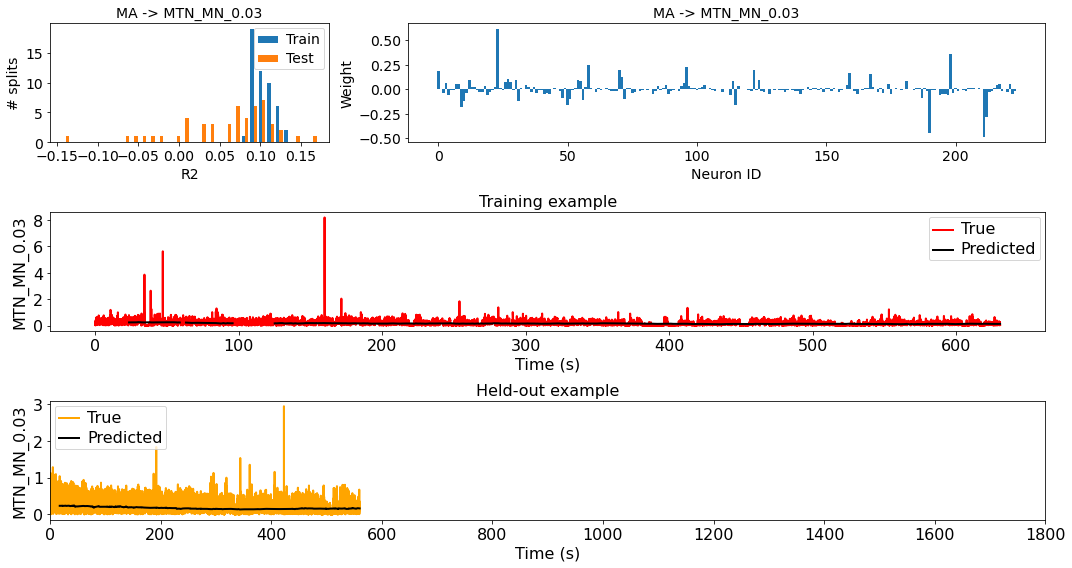

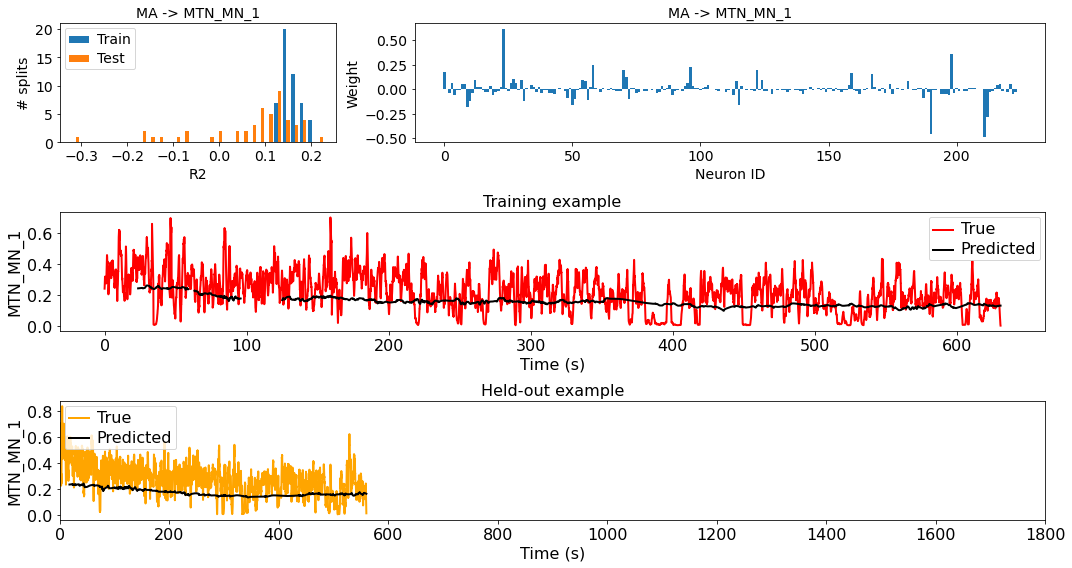

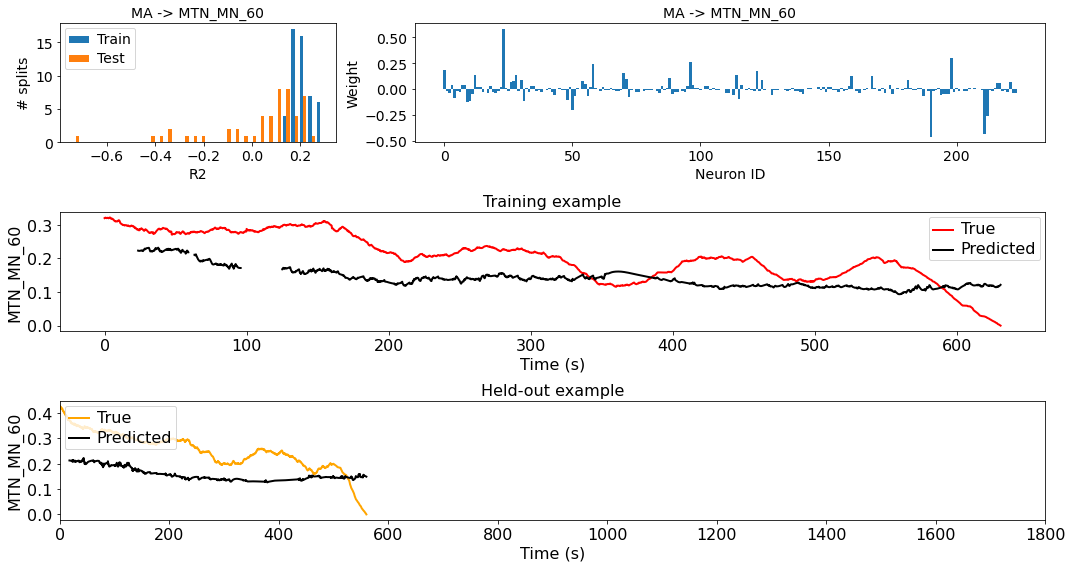

In [13]:
ISHFL = 0
ITRAIN_PLOT = 1
ITEST_PLOT = 1

FPS = 30.03

fsave = f'data/simple/mlv/ma_shfl/baker_{NRL_MDL}_{STRAIN_KEY}_{FSAVE_SFX}.npy'
data = np.load(fsave, allow_pickle=True)[0]

for targ in TARGS:

    r2_train = data['r2_train'][targ]
    r2_test = data['r2_test'][targ]
    
    print(f'TARG: {targ}, r2 test: {np.mean(r2_test)}')

    gs = gridspec.GridSpec(3, 3)

    fig = plt.figure(figsize=(15, 8), tight_layout=True)
    axs = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1:]), fig.add_subplot(gs[1, :]), fig.add_subplot(gs[2, :])]

    axs[0].hist(np.transpose([r2_train, r2_test]), bins=30)
    axs[0].legend(['Train', 'Test'])

    set_plot(axs[0], x_label='R2', y_label='# splits', title=f'{NRL_MDL.upper()} -> {targ}', font_size=14)

    axs[1].bar(np.arange(len(data['w'][targ][0])), np.mean(data['w'][targ], axis=0), width=1)
    set_plot(axs[1], x_label='Neuron ID', y_label='Weight', title=f'{NRL_MDL.upper()} -> {targ}', font_size=14)

    y_train = data['ys_train'][targ][ISHFL][ITRAIN_PLOT]
    t_train = np.arange(len(y_train))/FPS

    y_hat_train = data['y_hats_train'][targ][ISHFL][ITRAIN_PLOT]

    axs[2].plot(t_train, y_train, c='r', lw=2)
    axs[2].plot(t_train, y_hat_train, c='k', lw=2)

    axs[2].legend(['True', 'Predicted'])

    set_plot(axs[2], x_label='Time (s)', y_label=targ, title='Training example', font_size=16)

    y_test = data['ys_test'][targ][ISHFL][ITEST_PLOT]
    t_test = np.arange(len(y_test))/FPS

    y_hat_test = data['y_hats_test'][targ][ISHFL][ITEST_PLOT]

    axs[3].plot(t_test, y_test, c='orange', lw=2)
    axs[3].plot(t_test, y_hat_test, c='k', lw=2)

    axs[3].legend(['True', 'Predicted'], loc='upper left')

    set_plot(axs[3], x_lim=(0, 1800), x_label='Time (s)', y_label=targ, title='Held-out example', font_size=16)